In [2]:
#pip install matplotlib #Instalar modulos en caso de ser necesario
#pip install sklearn
#pip install seaborn
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
diabetes = pd.read_csv('./db/diabetes.csv')
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.shape

(768, 9)

In [7]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = diabetes[feature_cols]
y = diabetes.Outcome

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
logreg = LogisticRegression(max_iter=1000) #Se debe poner las iteraciones deseadas, si no marcará un error ya que por defecto
#solo son 100
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test) #Se predice la informacion de prueba
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) #Genera la matriz de confusion; este permite ver
#el grado de acierto de nuestro modelo
cnf_matrix

array([[118,  12],
       [ 26,  36]], dtype=int64)

La siguiente gráfica muestra la matriz de confusión, en dode se pueden observar: Verdaderos Positivos (VP), Falsos Positivos (FP), Falsos Negativos (FN) y Verdaderos Negativos (VN). Se puede ver cuantos datos fueron asignados de manera correcta y cuantos no.

Text(0.5, 257.44, 'Etiqueta de predicción')

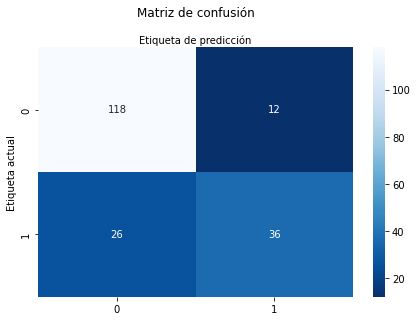

In [31]:
import numpy as np
class_names = [0, 1] #Este son los rangos para indicar si el paciente tiene o no diabetes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g') #Mapa de calor, muestra como se relaciona un dato y otro
ax.xaxis.set_label_position('top') #Para posicionar la informacion de xlabel
plt.tight_layout()
plt.title('Matriz de confusión', y = 1.1) #Posición del titulo
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de predicción')

In [33]:
print('Exactitud ', metrics.accuracy_score(y_test, y_pred)) #Muestra la exactitud que se puede tener al observar un caso
#de alguna persona con solo saber cada uno de los datos que se usaron en la tabla

Exactitud  0.8020833333333334
